# Predicción Univariada y Multivariada de los Principales Índices Financieros del Mundo

In [ ]:
from IPython.display import Image
Image(filename='img/imagenStock.jpg' ,  width= 1280)

# Trabajo Práctico N°1: Análisis y Visualización

## Introducción

En este práctico se pretende obtener una primera aproximación al dataset bajo análisis. En primer lugar se cargan y presentan brevemente los datos. Luego se proponen las consignas a seguir para la resolución del mismo. 

### Carga del dataset

In [2]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("inputs/dataset.csv", index_col=0, parse_dates=True)
# los argumentos index_col=0 y parse_dates se emplean para que la columna FECHA sea usada como índice

In [4]:
df.head()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
1997-02-07,824.109985,13260.0,904.030029,975.929993,4751.399902,3867.530029,2909.500000,20196.41992,NaN,1199.06,4333.899902,0.9998,1.0767,1.6670,1.1223,114.52,7.7472,8.3210,NaN
1997-03-07,831.440002,13285.0,916.919983,986.520020,4831.700195,3939.729980,2937.000000,20121.41016,15055.70020,1150.62,4323.459961,0.9994,1.0778,1.6885,1.1242,113.46,7.7445,8.3214,NaN
1997-04-07,837.950012,13494.0,NaN,NaN,4812.799805,3946.729980,2934.500000,19968.00000,14823.00000,1159.34,4323.819824,0.9995,NaN,NaN,1.1230,NaN,NaN,NaN,NaN
1997-07-07,841.690002,13502.0,912.200012,991.039978,4810.700195,4003.350098,2947.699951,19705.16992,14858.59961,1096.82,4291.450195,0.9998,1.0779,1.6870,1.1226,112.60,7.7428,8.3218,NaN
1997-08-07,846.330017,13617.0,918.750000,1005.809998,4758.500000,4030.100098,2929.800049,19853.89063,14792.20020,1109.67,4306.390137,0.9999,1.0790,1.6885,1.1180,112.76,7.7436,8.3219,NaN


In [5]:
df.tail()

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
2020-04-05,32387.27930,78876.0,2842.739990,8834.110352,5753.799805,10466.79981,4378.229980,NaN,23613.80078,NaN,31715.34961,66.8835,5.5714,1.2430,1.0908,106.82,7.7532,7.0622,110.0
2020-05-05,33546.51953,79471.0,2868.439941,8930.620117,5849.399902,10729.45996,4483.129883,NaN,23868.66016,NaN,31453.50977,66.9515,5.5623,1.2449,1.0840,106.52,7.7534,7.0622,110.0
2020-06-05,34158.89063,79064.0,2848.419922,8984.860352,5853.799805,10606.20020,4433.379883,NaN,24137.48047,2878.14,31685.75000,67.0475,5.6798,1.2347,1.0795,106.07,7.7520,7.1031,112.0
2020-07-05,35850.21094,78119.0,2881.189941,9101.879883,5936.000000,10759.26953,4501.439941,19674.76953,23980.63086,2871.52,31443.38086,67.1650,5.8027,1.2349,1.0834,106.36,7.7505,7.0825,112.0
2020-08-05,36183.89844,80263.0,2929.800049,9220.349609,NaN,10904.48047,4549.640137,20179.08984,24230.16992,2895.34,31642.69922,67.2750,5.7455,1.2436,1.0841,106.50,7.7512,7.0732,112.0


### Variables

- __FECHA__: se la usa como índice del _pandasDataFrame_

#### Índices (Valores al cierre de cada día):

- __MERV__: Merval (Argentina)
- __BVSPC__: Bovespa (Brasil)
- __GSPC__: Standard & Poors 500 (Estados Unidos)
- __NDX__: Nasdaq 100 (Estados Unidos)
- __FTSE__: FTSE 100 (Reino Unido)
- __GDAXI__: DAX 30 (Alemania)
- __FCHI__: CAC 40 (Francia)
- __N225__: Nikkei 225 (Japón)
- __HSI__: Hang Seng (China)
- __SSEC__: Shanghai Composite (China)
- __BSESN__: Bombay Stock Exchange (India)

#### Tipos de cambio:

- __DEXARUS__: cantidad de pesos argentinos necesarios para adquir un dólar estadounidense
- __DEXBZUS__: cantidad de reales necesarios para adquir un dólar estadounidense
- __DEXUSUK__: cantidad de dólares estadounidenses necesarios para adquir una libra esterlina
- __DEXUSEU__: cantidad de dólares estadounidenses necesarios para adquir un euro
- __DEXJPUS__: cantidad de yenes necesarios para adquir un dólar estadounidense
- __DEXHKUS__: cantidad de dólares hongkonenses necesarios para adquir un dólar estadounidense
- __DEXCHUS__: cantidad de yuanes chinos necesarios para adquirir un dólar estadounidense
- __DOLAR_BLUE__: serie de dolar blue, que se puede usar para corregir __DEXARUS__ en épocas de cepo cambiario. Surge de la combinación de dos series, una para el período 28/10/2011 - 16/12/2015 y otra para el período 01/09/2019 - 08/05/2020.

# Consignas del trabajo práctico N°1

El objetivo general del práctico es realizar una análsis exploratorio profundo de __sólo los índices__ del dataset, dado que las series de tipos de cambio serán usadas en el segundo práctico para expresar los índices en una moneda común. 
Se plantean algunas sugerencias para explorar las series en forma individual y conjunta por medio de medidas descriptivas y visualizaciones, con la finalidad de confeccionar un informe detallado sobre los índices analizados que sirva de base para, en practicos posteriores, modelar las series y hacer pronósticos.

Como las observaciones se encuentran indexadas en el tiempo, este tipo de datos se conocen como __series de tiempo__, por lo que algunas de las herramientas estadísticas habituales deben interpretarse con cierto cuidado y se pueden usar algunos recursos analíticos adicionales. El siguiente [tutorial](https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/) puede ser de gran ayuda para introducirse en la confección de algunos gráficos para series de tiempo y funcionalidades básicas de pandas para dicho tipo de datos.

## Fecha de entrega

- __Versión preliminar: 22/6__ 

- __Version final: 29/6__

## Condiciones de entrega

Realizar un informe en el cual se presenten los resultados y conclusiones del análisis realizado. El mismo debe estar pensado para un público técnico pero que desconoce los aspectos propios del problema a resolver tal como los compañeros de clase. Dicho informe puede ser un notebook, a condición de que en el mismo se efectúe un análisis escrito suficientemente detallado de los resultados. 



# Resolución

1) Determine el tipo de variables y el período de tiempo bajo análsis

Tipos de las variables. Vemos que todas las variables son numericas

In [6]:
df.dtypes

MERV          float64
BVSP          float64
GSPC          float64
NDX           float64
FTSE          float64
GDAXI         float64
FCHI          float64
N225          float64
HSI           float64
SSEC          float64
BSESN         float64
DEXARUS       float64
DEXBZUS       float64
DEXUSUK       float64
DEXUSEU       float64
DEXJPUS       float64
DEXHKUS       float64
DEXCHUS       float64
DOLAR_BLUE    float64
dtype: object

El tipo de dato del indice (FECHA) es `<M8[ns]` lo que hace referencia a una fecha `datetime64[ns]`

In [7]:
df.index.dtype

dtype('<M8[ns]')

Periodo de análisis

In [8]:
print(f'El periodo de analisis es de {df.index.min()} a {df.index.max()}')

El periodo de analisis es de 1997-01-08 00:00:00 a 2020-12-04 00:00:00


2) Indague sobre la existencia de valores faltantes. ¿Hay observaciones los fines de semana?. ¿Cómo trataría a los faltantes? ¿Por qué? (el tratamiento de los valores faltantes se hará en el proximo práctico, por lo que en lo que sigue use las series que surgen de omitirlos)

Mostramos la cantidad de valores faltantes por columna ordenados de mayor a menor

In [9]:
df.isnull().sum().sort_values(ascending=False)

DOLAR_BLUE    4820
SSEC           494
MERV           442
N225           438
BSESN          417
HSI            408
BVSP           384
DEXBZUS        299
DEXUSUK        299
DEXCHUS        299
DEXJPUS        299
DEXHKUS        299
NDX            286
GSPC           286
FTSE           277
GDAXI          245
FCHI           211
DEXARUS        109
DEXUSEU         76
dtype: int64

Los dias 6 y 7 de la semana son sabados y domingos. Por lo que podemos observar que si hay observaciones los fines de semana aunque en algunas filas haya valores nulos para algunos o todos los indices. 

In [10]:
df[df.index.dayofweek >= 5]

,MERV,BVSP,GSPC,NDX,FTSE,GDAXI,FCHI,N225,HSI,SSEC,BSESN,DEXARUS,DEXBZUS,DEXUSUK,DEXUSEU,DEXJPUS,DEXHKUS,DEXCHUS,DOLAR_BLUE
FECHA,,,,,,,,,,,,,,,,,,,
1997-09-07,NaN,NaN,907.539978,1010.099976,4762.399902,4026.969971,2950.600098,19697.16992,14703.70020,1120.84,4404.689941,0.9999,1.0796,1.6840,1.1180,112.97,7.7430,8.3220,NaN
1997-06-08,857.440002,12523.0,960.320007,1141.819946,5026.200195,4364.250000,3037.100098,19702.07031,16541.59961,1171.94,4523.009766,0.9998,1.0848,1.6008,1.0477,118.65,7.7420,8.3200,NaN
1997-11-08,853.289978,11949.0,937.000000,1101.180054,5031.899902,4333.149902,2983.399902,18824.17969,16460.50000,1184.08,4481.299805,0.9998,1.0857,1.5902,1.0567,115.85,7.7430,8.3196,NaN
1997-02-09,826.830017,11063.0,927.580017,1102.750000,4952.200195,4127.279785,2921.199951,18232.51953,13735.29981,1226.30,3950.030029,0.9998,1.0920,1.5897,1.0721,121.55,7.7490,8.3183,NaN
1997-03-09,834.179993,11119.0,927.859985,1100.439941,4976.899902,4062.129883,2918.000000,18735.16992,14714.00000,1240.82,3965.389893,0.9998,1.0918,1.5846,1.0779,121.03,7.7478,8.3189,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0
2020-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107.0
2020-01-05,NaN,NaN,2830.709961,8718.179688,5763.100098,NaN,NaN,19619.34961,NaN,NaN,NaN,66.6200,5.4858,1.2509,1.0985,106.76,7.7517,7.0622,108.0


3) Analice las distribuciones por medio de gráficos(por ejemplo: histogramas y boxplots) y medidas de estadística descriptiva (por ejemplo: media, varianza y coeficiente de variación). No olvide el análisis de los coeficientes de asimetría y kurtosis. .



Medidas de estadisticas descriptivas

In [11]:
for col in df.columns:
    print(col)
    mean = df[col].mean()
    var = df[col].var()
    std = df[col].std()
    coef = std/mean
    print('MEDIA: ', mean)
    print('VARIANZA: ', var)
    print('COEFICIENTE DE VARIACION: ', coef, '=>', coef * 100, '%')

MERV
MEDIA:  6890.289940792136
VARIANZA:  106479666.88394535
COEFICIENTE DE VARIACION:  1.4976000457495078 => 149.76000457495078 %
BVSP
MEDIA:  44262.57933840439
VARIANZA:  686943633.5516042
COEFICIENTE DE VARIACION:  0.5921392281424238 => 59.21392281424238 %
GSPC
MEDIA:  1550.3540161304122
VARIANZA:  354020.24413258844
COEFICIENTE DE VARIACION:  0.3837807347668983 => 38.37807347668983 %
NDX
MEDIA:  2974.2874359721786
VARIANZA:  3937303.276411785
COEFICIENTE DE VARIACION:  0.6671392579600517 => 66.71392579600517 %
FTSE
MEDIA:  5878.137793727951
VARIANZA:  959271.755861383
COEFICIENTE DE VARIACION:  0.16662151015279264 => 16.662151015279264 %
GDAXI
MEDIA:  7224.943425857562
VARIANZA:  8232066.571626926
COEFICIENTE DE VARIACION:  0.3971183781830537 => 39.71183781830537 %
FCHI
MEDIA:  4389.669302054412
VARIANZA:  852300.3452979678
COEFICIENTE DE VARIACION:  0.2103122300773162 => 21.03122300773162 %
N225
MEDIA:  14582.497111208251
VARIANZA:  18557307.23281786
COEFICIENTE DE VARIACION:  0.2

Añadimos como columna el año

In [12]:
df['YEAR'] = df.index.year
year_range = df['YEAR'].max() - df['YEAR'].min()
year_segment = pd.cut(df['YEAR'], bins=year_range)
df['YEAR_SEGMENT'] = year_segment

Graficamos histograma y funcion de distribucion en intervalos de un año gracias al rango de años

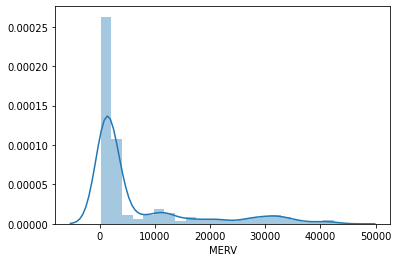

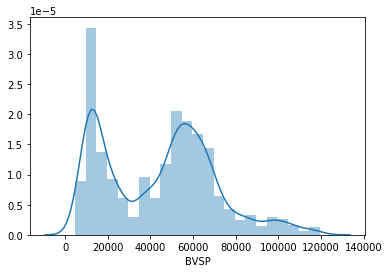

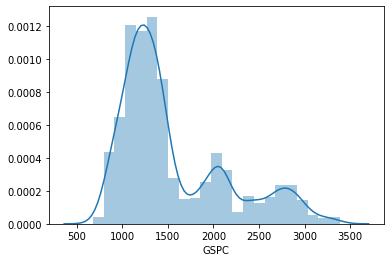

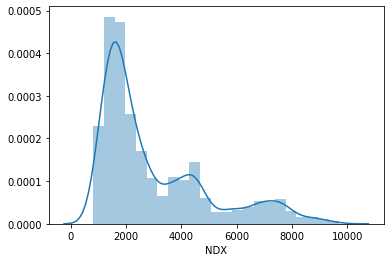

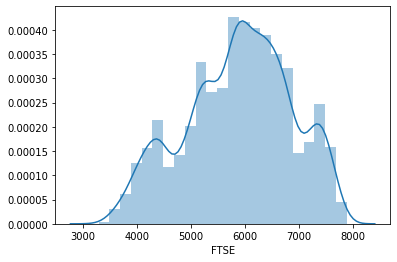

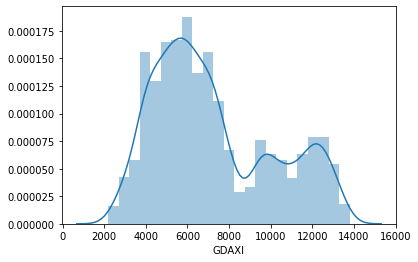

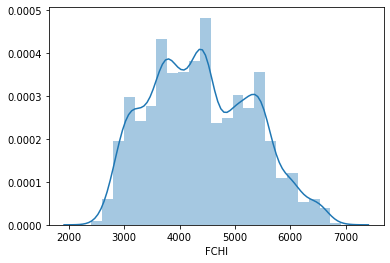

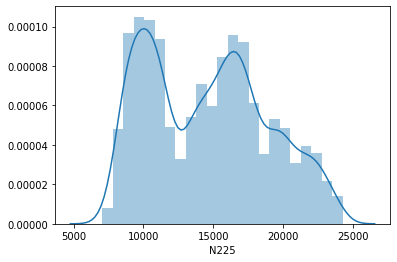

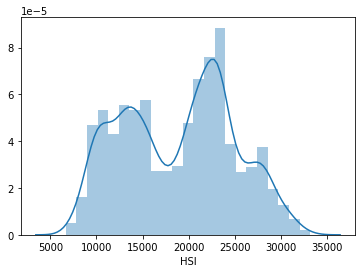

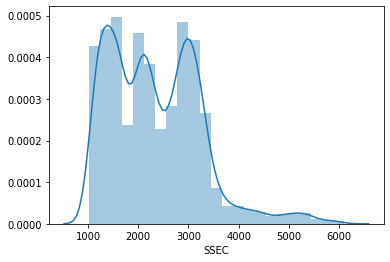

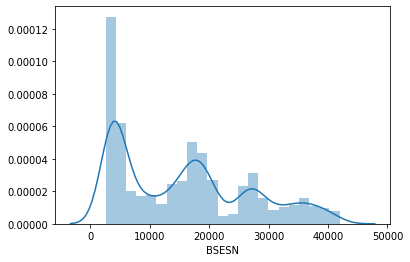

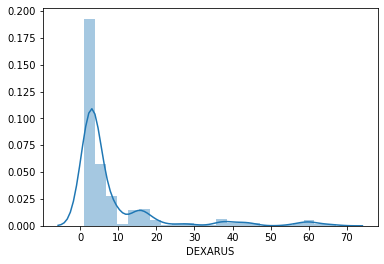

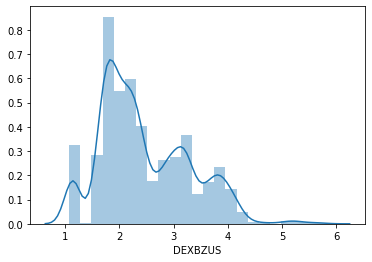

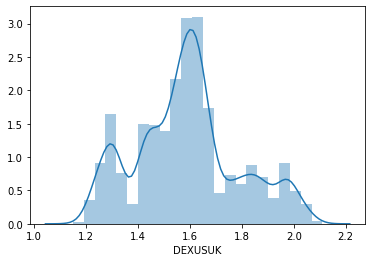

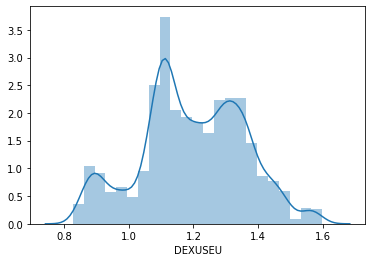

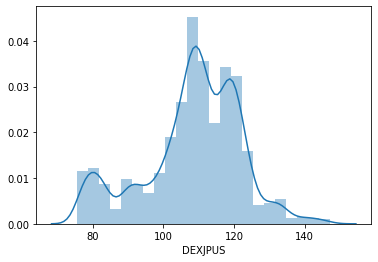

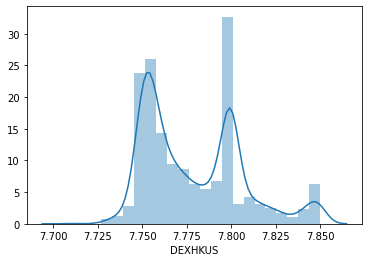

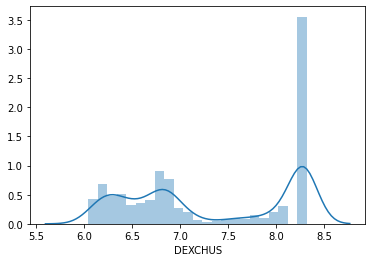

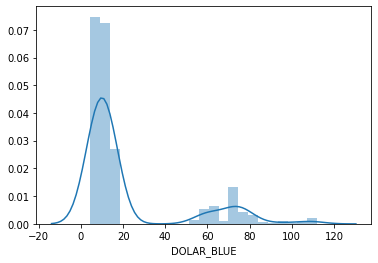

In [13]:
columns = [col for col in df.columns if col not in ['YEAR', 'YEAR_SEGMENT']]
for col in columns:
    seaborn.distplot(df[col].dropna(), bins=year_range)
    plt.show()

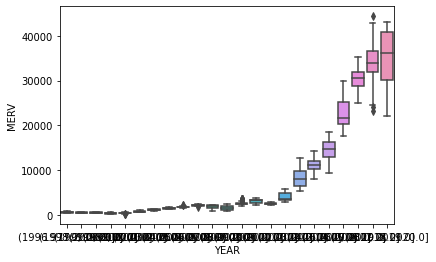

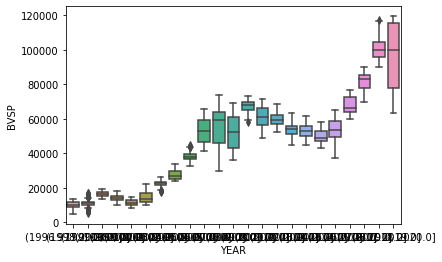

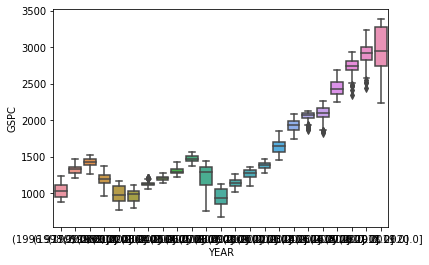

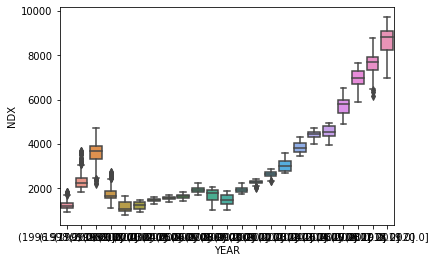

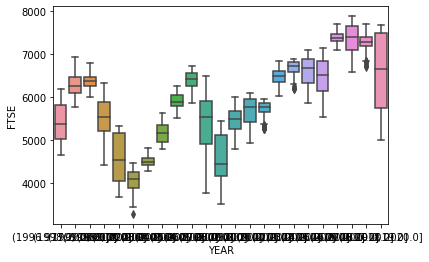

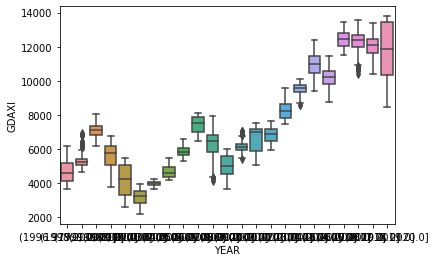

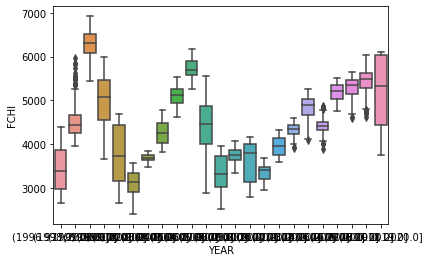

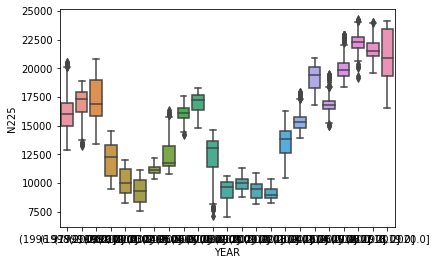

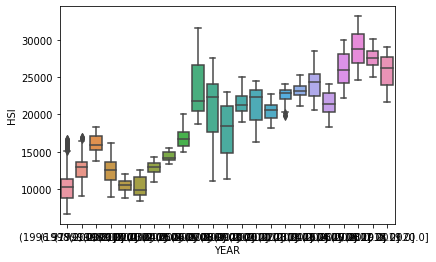

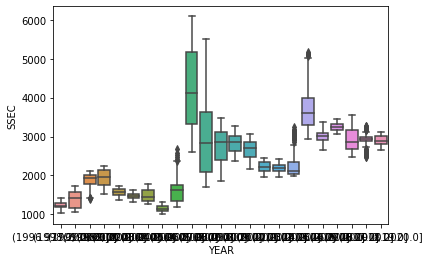

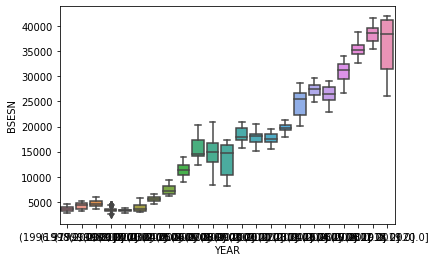

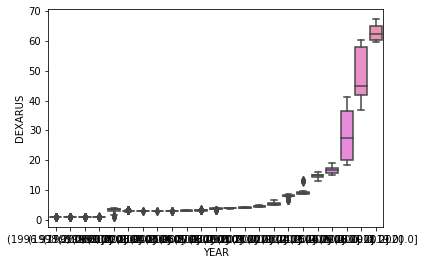

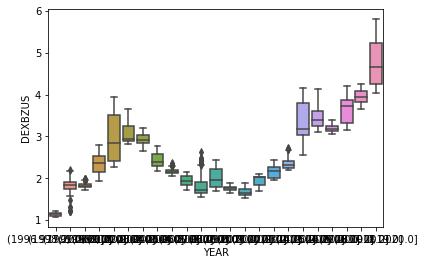

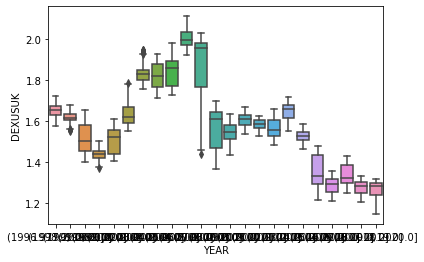

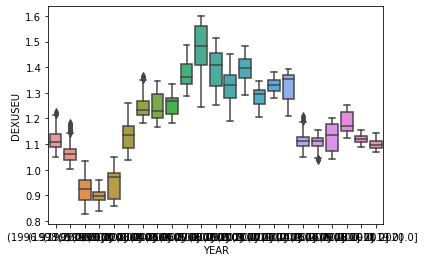

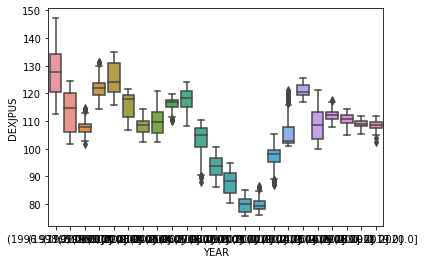

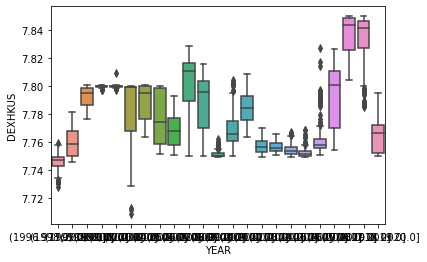

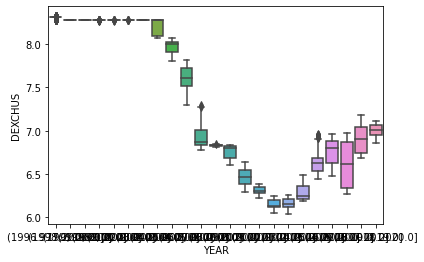

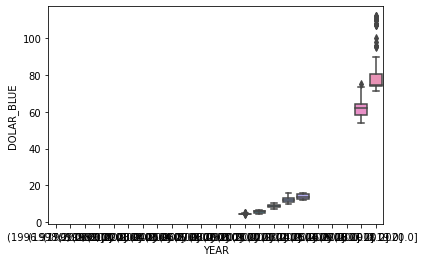

In [14]:
for col in columns:
    seaborn.boxplot(data=df, x=year_segment, y=col)
    plt.show()

4) ¿Hay outliers? Si es así, ¿qué sugiere hacer con ellos?

5) Seleccione un índice y grafique un boxplot para cada año. ¿Se mantiene inalterada en el tiempo la distribución?

6) Explore la existencia de estacionalidad.

7) Estudie la evolución temporal de los índices. ¿En qué sentido tienden a moverse? ¿Hay períodos de crisis(caídas fuertes y repentinas de los índices)? ¿Coinciden con las noticias? ¿Los índices tienden a moverse en forma conjunta?  En caso de que existan crisis, ¿son globales o propias de mercados individuales? 

8) Investigue si los índices tienden a moverse en forma conjunta. ¿Siempre se da dicho patrón?

9) Seleccione un índice y confeccione un diagrama de dispersión entre el mismo y su valor retardado un período. Repita el mismo procedimiento entre el índice y su valores retardado 2, 3 y 4 períodos.

10) Grafique e interprete las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF). El siguiente [link](https://machinelearningmastery.com/gentle-introduction-autocorrelation-partial-autocorrelation/) puede ser útil para una primera aproximación.

## Conclusiones